In [1]:
!pip install -q tensorflow-recommenders
!pip install -q --upgrade tensorflow-datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 4.3 MB/s eta 0:00:00


In [2]:
import pprint

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

import tensorflow_recommenders as tfrs

In [3]:
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import sys
import csv
import gzip
import copy
import datetime
import pickle
from sklearn import metrics
from tabulate import tabulate

In [4]:
seed_value = 42  # seed for reproducibility
random.seed(seed_value)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
sys.path.append('/content/drive/MyDrive/ctr/code/model')

In [7]:
import dcn
import run_models

In [8]:
with open('/content/drive/MyDrive/ctr/data/baseline/fitting_history.V1.0_num_0.p', 'rb') as f:
    fitting_history = pickle.load(f)

In [13]:
baseline_history = {
    'logloss' : fitting_history['logloss'],
    'auc' : fitting_history['auc']
}

In [15]:
with open('/content/drive/MyDrive/ctr/data/feature_engineering/fitting_history.V1.2_num_0.p', 'rb') as f:
    fitting_history = pickle.load(f)

In [16]:
feature_engineering_history = {
    'logloss' : fitting_history['logloss'],
    'auc' : fitting_history['auc']
}

In [17]:
with open('/content/drive/MyDrive/ctr/data/feature_engineering.rare_count/fitting_history.V1.2_num_0.p', 'rb') as f:
    fitting_history = pickle.load(f)

In [18]:
feature_engineering_history_rare_count = {
    'logloss' : fitting_history['logloss'],
    'auc' : fitting_history['auc']
}

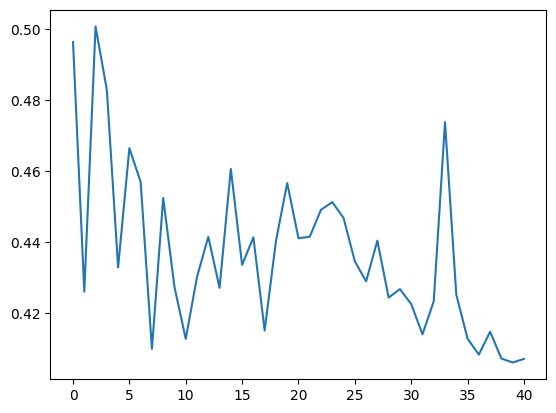

In [23]:
plt.plot(baseline_history['logloss'], label='baseline')
plt.show()

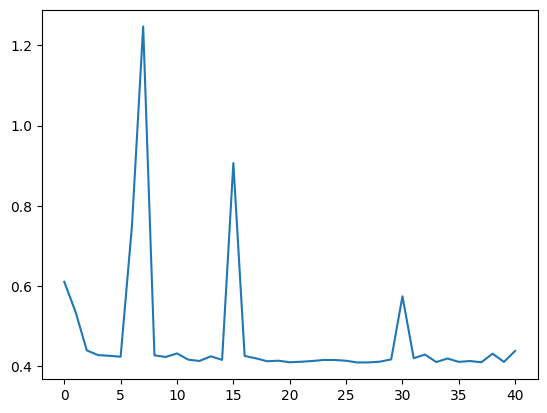

In [24]:
plt.plot(feature_engineering_history['logloss'], label='baseline')
plt.show()

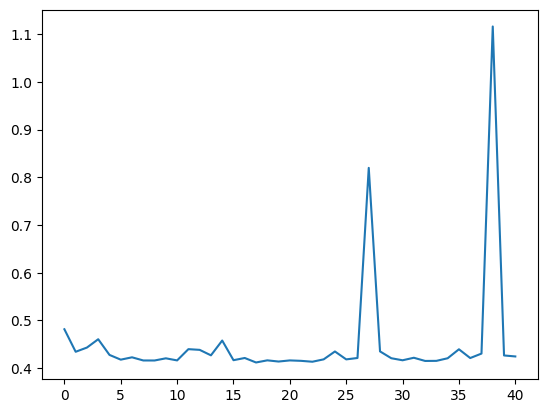

In [25]:
plt.plot(feature_engineering_history_rare_count['logloss'], label='feature_engineering_rare_count')
plt.show()

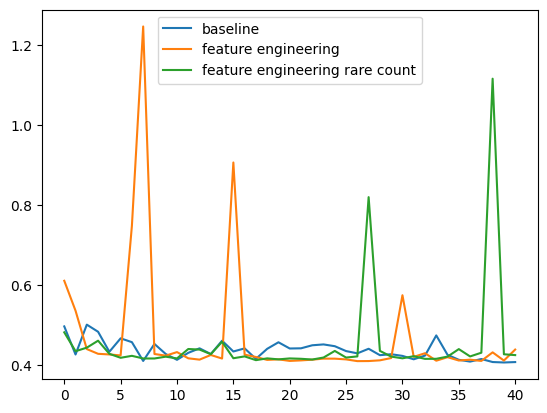

In [27]:
plt.plot(baseline_history['logloss'], label='baseline')
plt.plot(feature_engineering_history['logloss'], label='feature engineering')
plt.plot(feature_engineering_history_rare_count['logloss'], label='feature engineering rare count')
plt.legend(loc='best')
plt.show()

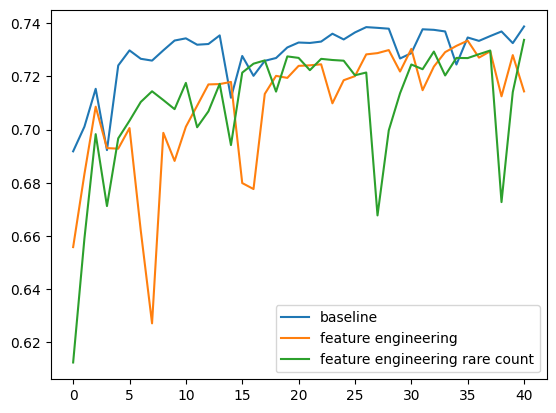

In [26]:
plt.plot(baseline_history['auc'], label='baseline')
plt.plot(feature_engineering_history['auc'], label='feature engineering')
plt.plot(feature_engineering_history_rare_count['auc'], label='feature engineering rare count')
plt.legend(loc='best')
plt.show()